In [8]:
import math
import os
import re
import altair as alt
import numpy as np
import pandas as pd
import scipy.stats
import yaml
import neutcurve
import scipy.stats
print(f"Using `neutcurve` version {neutcurve.__version__}")
import sys
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import LogLocator, NullFormatter
import seaborn as sns

# allow more rows for Altair
_ = alt.data_transformers.disable_max_rows()

#import altair themes from /data/custom_analyses_data/theme.py and enable
import theme
alt.themes.register('main_theme', theme.main_theme)
alt.themes.enable('main_theme')
os.chdir('/fh/fast/bloom_j/computational_notebooks/tmcmahon/2024/02_RSV/RSV_evolution_neut') #sets working directory to repo/project root folder
plt.rcParams['svg.fonttype'] = 'none' #from bernadeta, for correct font svg output

Using `neutcurve` version 2.1.0


In [9]:
#warnings.simplefilter('ignore')
#theme_set(theme_seaborn(style='white', context='talk', font_scale=1))

In [10]:
df = pd.read_csv('01_data/other/RSVNeut_FractionInfectivity_NIBSC_B1_complete.csv')

In [11]:
fits = neutcurve.curvefits.CurveFits(
            data=df,
            fixbottom=0,
            #max_viruses_per_subplot=11
            )

#fitParams = fits.fitParams(ics=[10,50, 90, 95, 97, 98, 99])

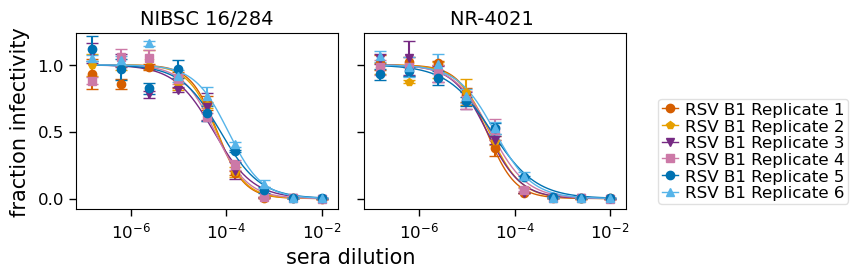

In [12]:
fig, axes = fits.plotSera(
    xlabel='sera dilution', 
    max_viruses_per_subplot=6, 
    colors=['#D55E00', '#E69F00', '#762A83', '#CC79A7', '#0072B2', '#56B4E9', '#009E73', 
            '#1B7837', '#000000', '#999999', '#F0E442'], 
    markers=['o', 'p', 'v', 's', 'o', '^', 'D', 's', 'v', '8', 's'],
    draw_in_bounds=True, 
    ncol=2, 
    sharex=False, 
    sharey=True, 
    #legendfontsize=14
)

fig.savefig('03_output/plots/NeutCurves_NIBSC_B1.svg', bbox_inches='tight')


In [13]:
fits.fitParams()

,serum,virus,replicate,nreplicates,ic50,ic50_bound,ic50_str,midpoint,midpoint_bound,midpoint_bound_type,slope,top,bottom,r2,rmsd
0,NIBSC 16/284,RSV B1 Replicate 1,average,3,0.000065,interpolated,6.5e-05,0.000065,0.000065,interpolated,1.545477,1.0,0.0,0.980733,0.058204
1,NIBSC 16/284,RSV B1 Replicate 2,average,3,0.000063,interpolated,6.29e-05,0.000063,0.000063,interpolated,1.455098,1.0,0.0,0.993484,0.035691
2,NIBSC 16/284,RSV B1 Replicate 3,average,3,0.000055,interpolated,5.5e-05,0.000055,0.000055,interpolated,1.057838,1.0,0.0,0.962775,0.083006
3,NIBSC 16/284,RSV B1 Replicate 4,average,3,0.000058,interpolated,5.81e-05,0.000058,0.000058,interpolated,1.273543,1.0,0.0,0.985471,0.052720
4,NIBSC 16/284,RSV B1 Replicate 5,average,3,0.000076,interpolated,7.61e-05,0.000076,0.000076,interpolated,1.046592,1.0,0.0,0.970958,0.072592
5,NIBSC 16/284,RSV B1 Replicate 6,average,3,0.000111,interpolated,0.000111,0.000111,0.000111,interpolated,1.229174,1.0,0.0,0.981174,0.061923
6,NR-4021,RSV B1 Replicate 1,average,3,0.000026,interpolated,2.61e-05,0.000026,0.000026,interpolated,1.453999,1.0,0.0,0.997058,0.024508
7,NR-4021,RSV B1 Replicate 2,average,3,0.000029,interpolated,2.93e-05,0.000029,0.000029,interpolated,1.307658,1.0,0.0,0.989122,0.043908
8,NR-4021,RSV B1 Replicate 3,average,3,0.000026,interpolated,2.64e-05,0.000026,0.000026,interpolated,1.222687,1.0,0.0,0.991938,0.040040
9,NR-4021,RSV B1 Replicate 4,average,3,0.000031,interpolated,3.13e-05,0.000031,0.000031,interpolated,1.141348,1.0,0.0,0.990366,0.041936


In [14]:
fits.fitParams().to_csv("03_output/processed_data/IC50s_NIBSC_B1.csv")